In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('dataset/recruitment_data.csv')
print(df)

      Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0      26       1               2                0                  3   
1      39       1               4               12                  3   
2      48       0               2                3                  2   
3      34       1               2                5                  2   
4      30       0               1                6                  1   
...   ...     ...             ...              ...                ...   
1495   48       0               2                3                  4   
1496   27       1               2               10                  3   
1497   24       1               1                1                  2   
1498   48       0               2                4                  4   
1499   34       1               2               11                  5   

      DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0               26.783828              48       

In [7]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [8]:
def dataset_info(df):
    print("Dataset Information:")
    print(df.info())
    print("\nFirst 5 Rows:")
    print(df.head())
    print("\nSummary Statistics:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())

dataset_info(df)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB
None

First 5 Rows:
   Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0   26       1               2                0                  3   
1   39   

In [9]:
categorical_columns = ['Gender', 'EducationLevel', 'RecruitmentStrategy', 'HiringDecision']
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())

# Correlation matrix
print("\nCorrelation Matrix:")
print(df.corr())


Unique values in Gender:
Gender
0    762
1    738
Name: count, dtype: int64

Unique values in EducationLevel:
EducationLevel
2    740
3    317
1    307
4    136
Name: count, dtype: int64

Unique values in RecruitmentStrategy:
RecruitmentStrategy
2    770
1    445
3    285
Name: count, dtype: int64

Unique values in HiringDecision:
HiringDecision
0    1035
1     465
Name: count, dtype: int64

Correlation Matrix:
                          Age    Gender  EducationLevel  ExperienceYears  \
Age                  1.000000  0.011286        0.032610         0.024780   
Gender               0.011286  1.000000        0.009676        -0.028502   
EducationLevel       0.032610  0.009676        1.000000        -0.000951   
ExperienceYears      0.024780 -0.028502       -0.000951         1.000000   
PreviousCompanies   -0.032580 -0.061915        0.007367         0.015784   
DistanceFromCompany -0.021031  0.003822        0.020600         0.007920   
InterviewScore      -0.025579 -0.020887        0.012

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


Correlation Matrix:
                          Age    Gender  EducationLevel  ExperienceYears  \
Age                  1.000000  0.011286        0.032610         0.024780   
Gender               0.011286  1.000000        0.009676        -0.028502   
EducationLevel       0.032610  0.009676        1.000000        -0.000951   
ExperienceYears      0.024780 -0.028502       -0.000951         1.000000   
PreviousCompanies   -0.032580 -0.061915        0.007367         0.015784   
DistanceFromCompany -0.021031  0.003822        0.020600         0.007920   
InterviewScore      -0.025579 -0.020887        0.012807        -0.051701   
SkillScore          -0.008068  0.012333       -0.043367         0.006323   
PersonalityScore     0.037727  0.023729        0.031115         0.013891   
RecruitmentStrategy  0.018064 -0.023753       -0.036923         0.029603   
HiringDecision       0.001850 -0.002249        0.236710         0.122494   

                     PreviousCompanies  DistanceFromCompany  Inter

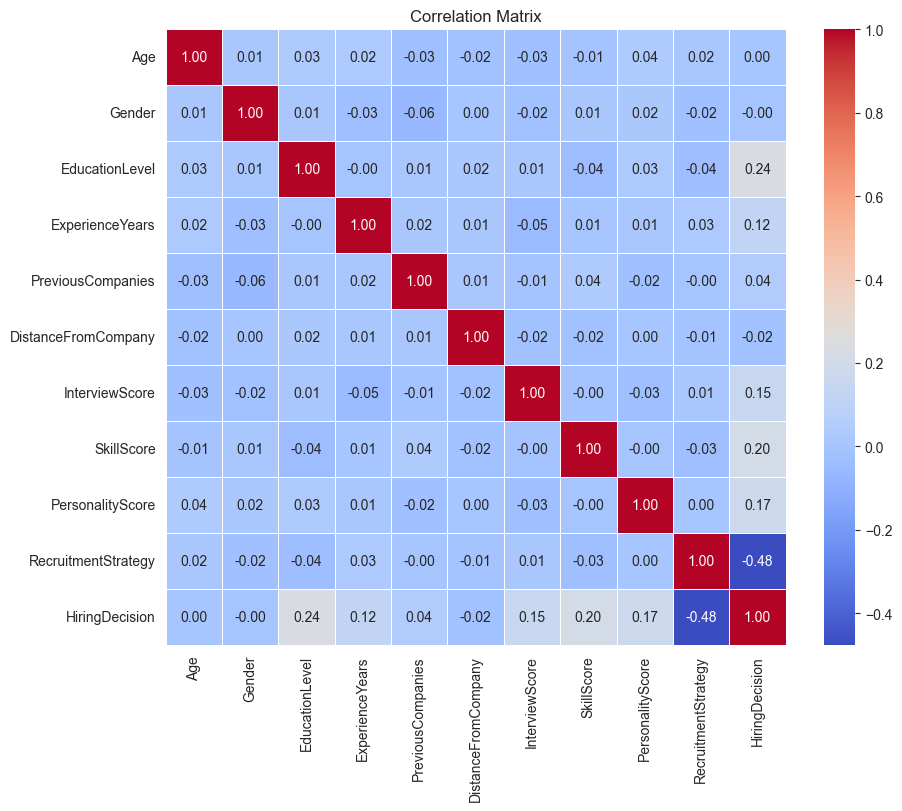

In [39]:
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

C:\Users\amirn\AppData\Local\Temp\ipykernel_15132\3295640240.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hiring_percentage.index, y=hiring_percentage.values, palette="viridis")


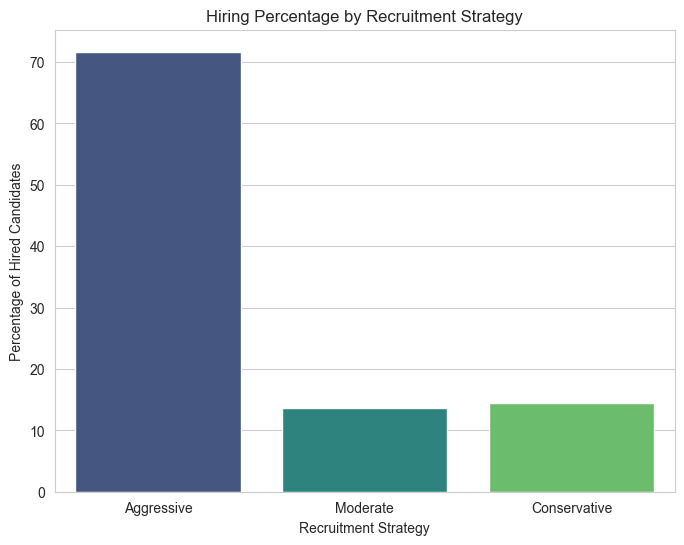

In [40]:
hiring_percentage = df.groupby('RecruitmentStrategy')['HiringDecision'].mean() * 100

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=hiring_percentage.index, y=hiring_percentage.values, palette="viridis")
plt.xlabel("Recruitment Strategy")
plt.ylabel("Percentage of Hired Candidates")
plt.title("Hiring Percentage by Recruitment Strategy")
plt.xticks(ticks=[0, 1, 2], labels=["Aggressive", "Moderate", "Conservative"])
plt.show()


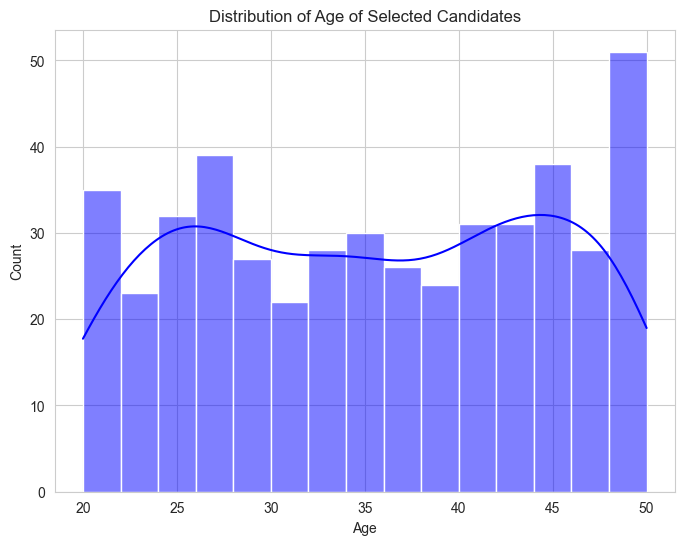

In [41]:
selected_candidates = df[df['HiringDecision'] == 1]
plt.figure(figsize=(8, 6))
sns.histplot(selected_candidates['Age'], bins=15, kde=True, color='blue')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age of Selected Candidates")
plt.show()


C:\Users\amirn\AppData\Local\Temp\ipykernel_15132\2631153022.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=selected_candidates['Gender'], palette="pastel")


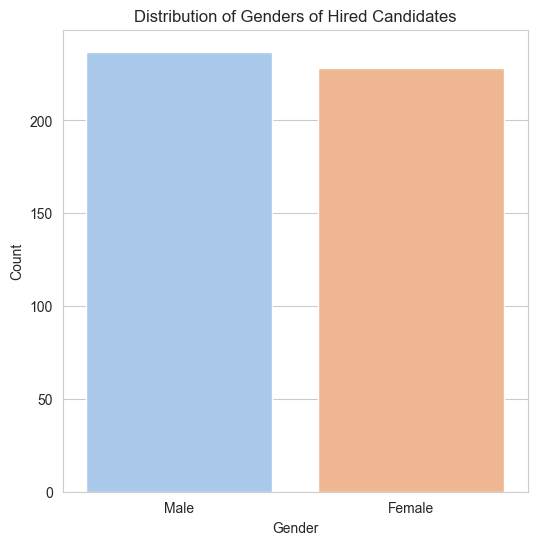

In [42]:
plt.figure(figsize=(6, 6))
sns.countplot(x=selected_candidates['Gender'], palette="pastel")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Genders of Hired Candidates")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
plt.show()


C:\Users\amirn\AppData\Local\Temp\ipykernel_15132\4235196898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=selected_candidates['EducationLevel'], palette="muted")


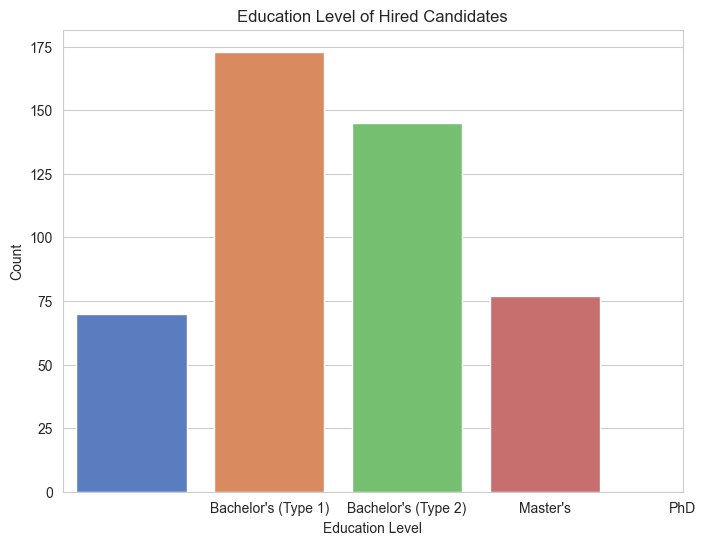

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x=selected_candidates['EducationLevel'], palette="muted")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Education Level of Hired Candidates")
plt.xticks(ticks=[1, 2, 3, 4], labels=["Bachelor's (Type 1)", "Bachelor's (Type 2)", "Master's", "PhD"])
plt.show()

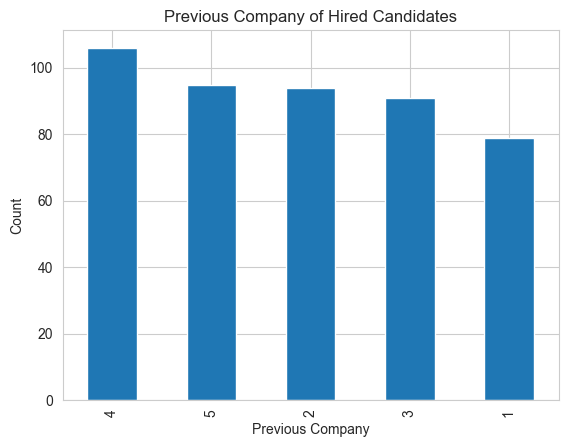

In [44]:
hired_df = df[df['HiringDecision'] == 1]
hired_df['PreviousCompanies'].value_counts().plot(kind='bar')
plt.xlabel('Previous Company')
plt.ylabel('Count')
plt.title('Previous Company of Hired Candidates')
plt.show()

C:\Users\amirn\AppData\Local\Temp\ipykernel_15132\4066452707.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(selected_candidates['InterviewScore'], label='Interview Score', shade=True)
C:\Users\amirn\AppData\Local\Temp\ipykernel_15132\4066452707.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(selected_candidates['SkillScore'], label='Skill Score', shade=True)
C:\Users\amirn\AppData\Local\Temp\ipykernel_15132\4066452707.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(selected_candidates['PersonalityScore'], label='Personality Score', shade=True)


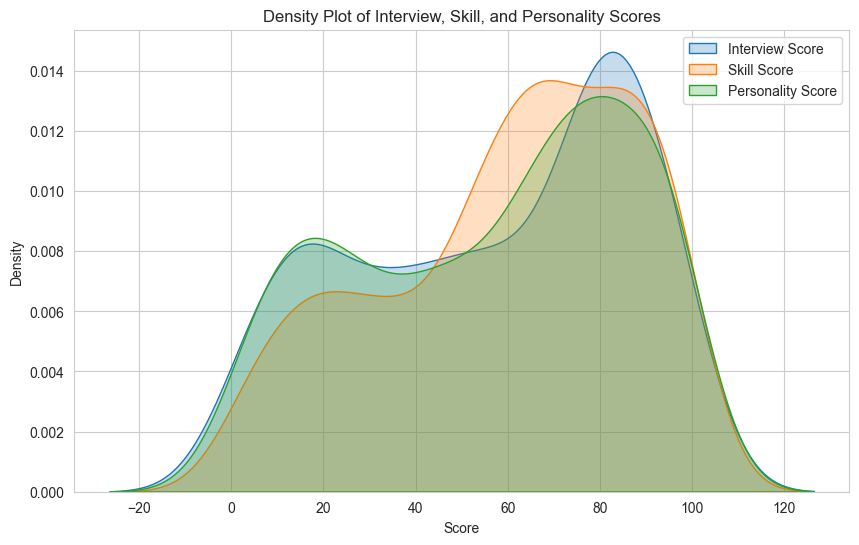

In [45]:
plt.figure(figsize=(10, 6))
sns.kdeplot(selected_candidates['InterviewScore'], label='Interview Score', shade=True)
sns.kdeplot(selected_candidates['SkillScore'], label='Skill Score', shade=True)
sns.kdeplot(selected_candidates['PersonalityScore'], label='Personality Score', shade=True)
plt.xlabel("Score")
plt.ylabel("Density")
plt.title("Density Plot of Interview, Skill, and Personality Scores")
plt.legend()
plt.show()

### Predictive modeling

In [46]:
X = df.drop('HiringDecision', axis=1)
y = df['HiringDecision']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE

In [48]:
from catboost import CatBoostClassifier

In [49]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class_counts = np.bincount(y_train)
min_samples = np.min(class_counts)
max_samples = np.max(class_counts)
imbalance_ratio = min_samples / max_samples

if imbalance_ratio < 0.5:
    print(f"Class imbalance detected. Imbalance ratio: {imbalance_ratio:.2f}")
    if imbalance_ratio < 0.1:
        print("Severe imbalance. Applying SMOTE...")
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)
    else:
        print("Moderate imbalance. Consider adjusting class weights in models.")


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = CatBoostClassifier(verbose=0, iterations=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\033[1mAccuracy:\033[0m\n", accuracy)
print("\033[1mROC AUC Score:\033[0m\n", roc_auc)
print("\n\033[1mConfusion Matrix:\033[0m\n", confusion_matrix(y_test, y_pred))
print("\n\033[1mClassification Report:\033[0m\n", classification_report(y_test, y_pred))

Class imbalance detected. Imbalance ratio: 0.46
Moderate imbalance. Consider adjusting class weights in models.
Accuracy:
 0.9566666666666667
ROC AUC Score:
 0.9291381668946648

Confusion Matrix:
 [[210   5]
 [  8  77]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       215
           1       0.94      0.91      0.92        85

    accuracy                           0.96       300
   macro avg       0.95      0.94      0.95       300
weighted avg       0.96      0.96      0.96       300



In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
catboost_classifier = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=None,
    l2_leaf_reg=3,
    bootstrap_type='Bayesian',
    verbose=0
)

catboost_classifier.fit(X_train_scaled, y_train)

def predict_function(X_test_scaled):
    return catboost_classifier.predict_proba(X_test_scaled)
    #return catboost_classifier.predict(X_test_scaled)

y_pred_catboost = predict_function(X_test_scaled)

In [82]:
print("Classification Report:")
print(classification_report(y_test, y_pred_catboost))

roc_auc_catboost = roc_auc_score(y_test, y_pred_catboost)
print(f"AUC-ROC Score: {roc_auc_catboost:.4f}")

conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)
print("Confusion Matrix:")
print(conf_matrix_catboost)

feature_importance_catboost = pd.Series(catboost_classifier.feature_importances_, index=X.columns)
feature_importance_catboost.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
feature_importance_catboost.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (CatBoost)')
plt.show()

Classification Report:


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

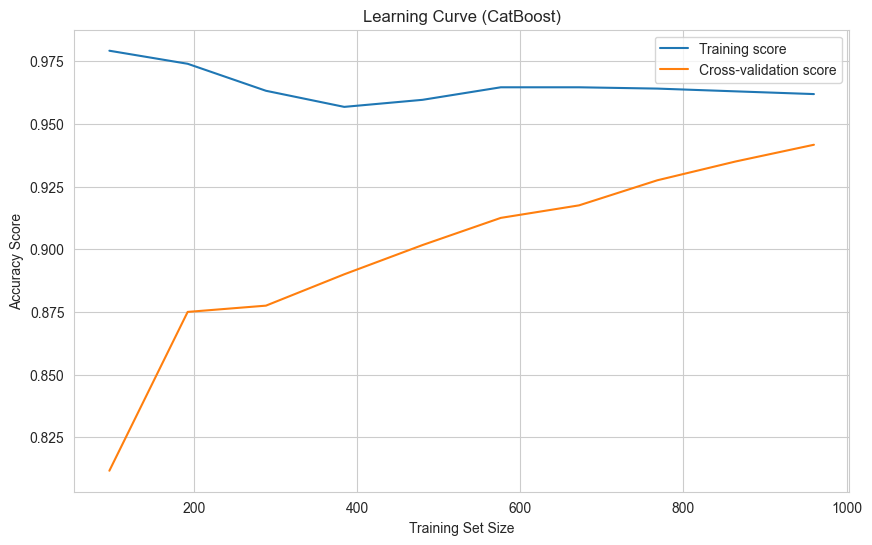

In [71]:
from sklearn.model_selection import learning_curve

train_sizes_catboost, train_scores_catboost, valid_scores_catboost = learning_curve(
    catboost_classifier, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy'
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_catboost, np.mean(train_scores_catboost, axis=1), label='Training score')
plt.plot(train_sizes_catboost, np.mean(valid_scores_catboost, axis=1), label='Cross-validation score')
plt.title('Learning Curve (CatBoost)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Using SHAP for Model Interpretability

In [83]:
from src.shap import KernelExplainer, SamplingExplainer
from src.plot_shap import ShapPlotter

In [84]:
shap_red = "#ff0051"
shap_blue = "#008bfb"

In [67]:
custom_sampling_explainer = SamplingExplainer(predict_function, X_train)
custom_sampling_shap_values = custom_sampling_explainer.shap_values(X_test, max_samples=len(X_train))

Calculating SHAP values: 100%|██████████| 300/300 [00:06<00:00, 46.26it/s]


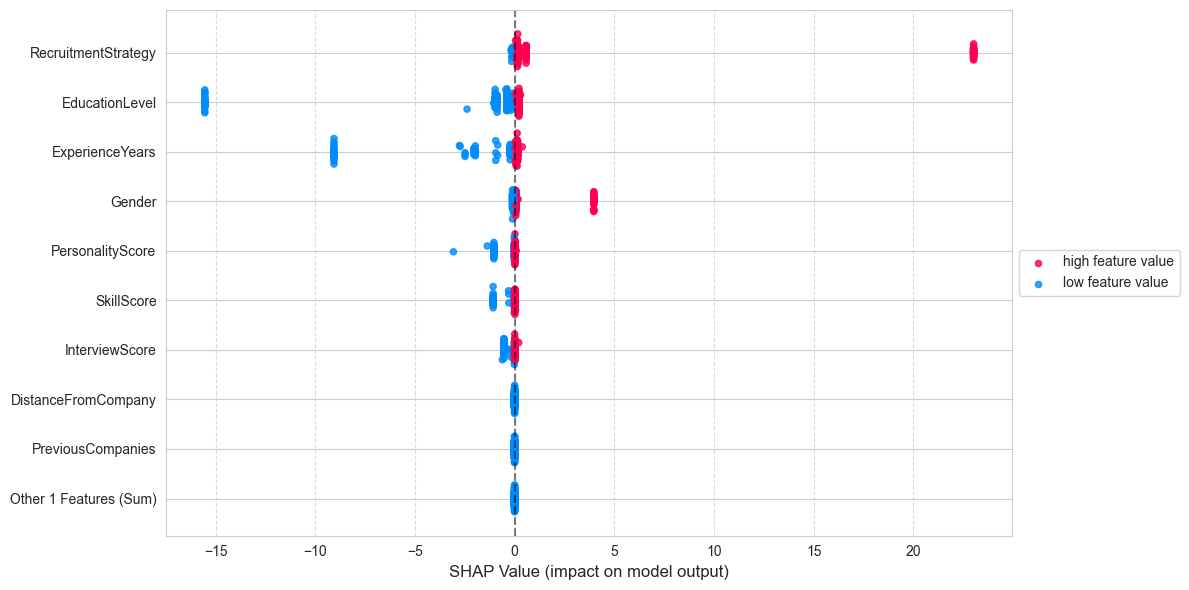

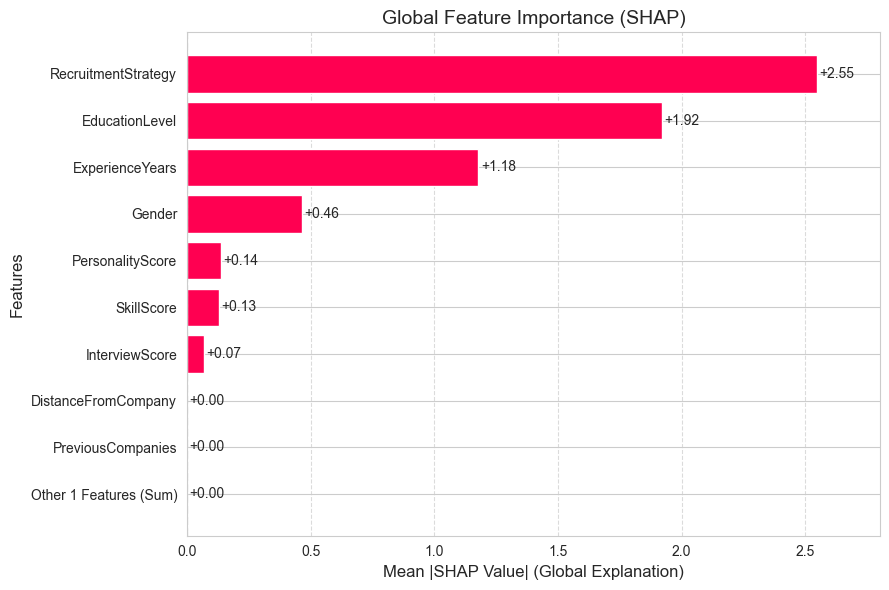

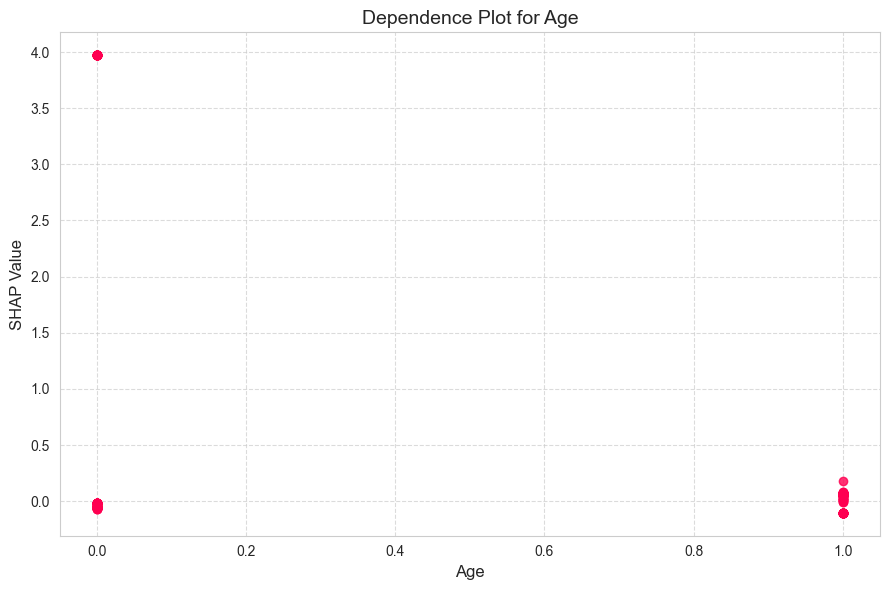

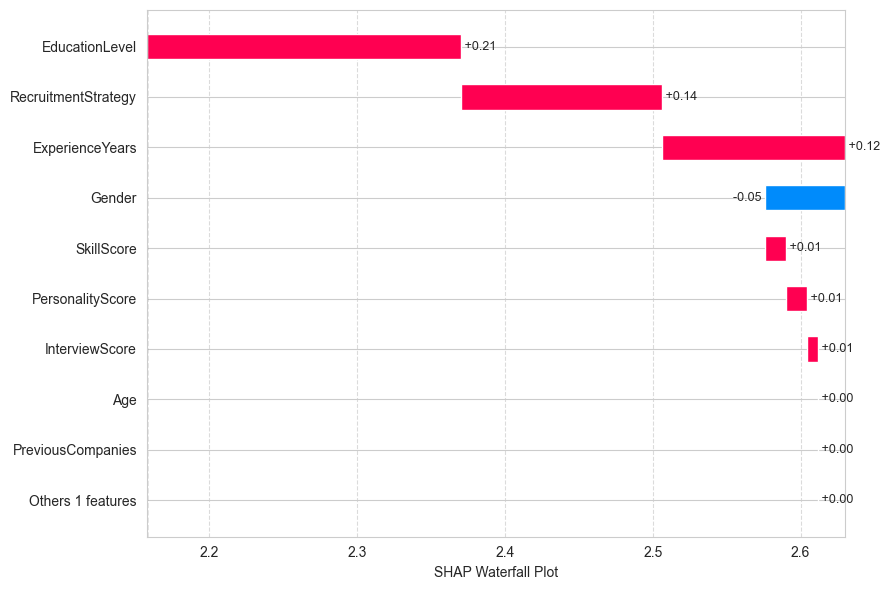

In [68]:
values = custom_sampling_shap_values
expected_value = custom_sampling_explainer.expected_value
data = X_test.values
feature_names = X.columns

plotter = ShapPlotter()

plotter.beeswarm(values, feature_names)
plotter.bar(values, feature_names)
plotter.dependence(values[:, 1], data[:, 1], feature_names[0])
plotter.waterfall(values[0, :], feature_names, expected_value)


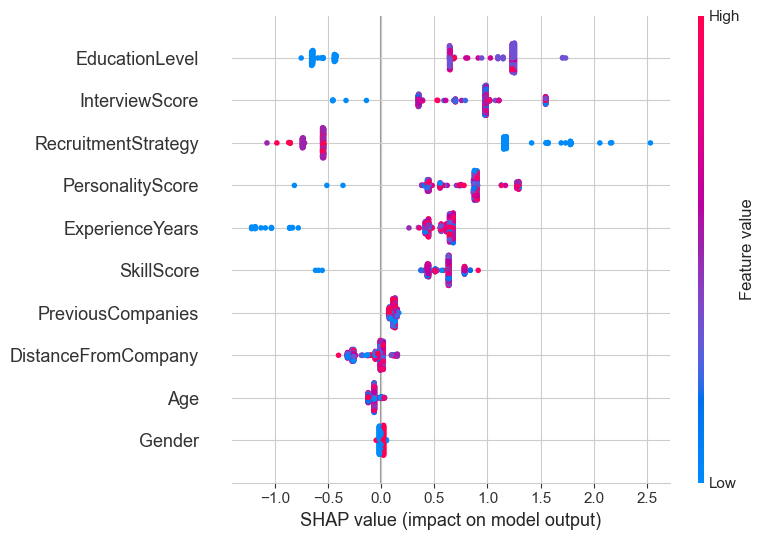

In [88]:
import shap
# Создаем объект SHAP Explainer для модели CatBoost
explainer = shap.TreeExplainer(catboost_classifier)

# Получаем SHAP значения для тестовой выборки
shap_values = explainer.shap_values(X_test)

# Визуализируем влияние признаков
shap.summary_plot(shap_values, X_test)


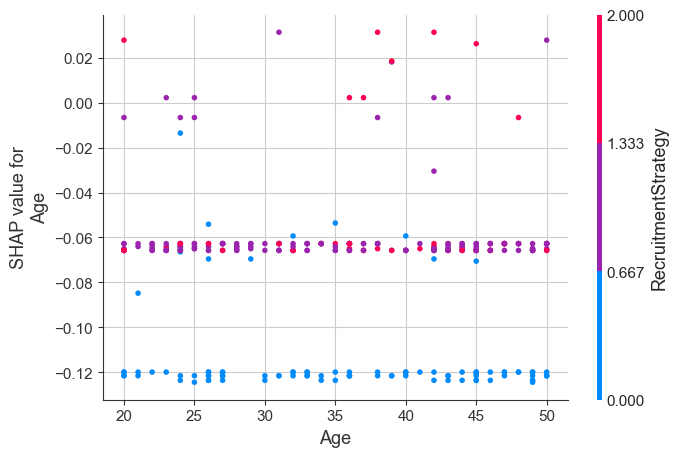

In [89]:
shap.dependence_plot('Age', shap_values, X_test)


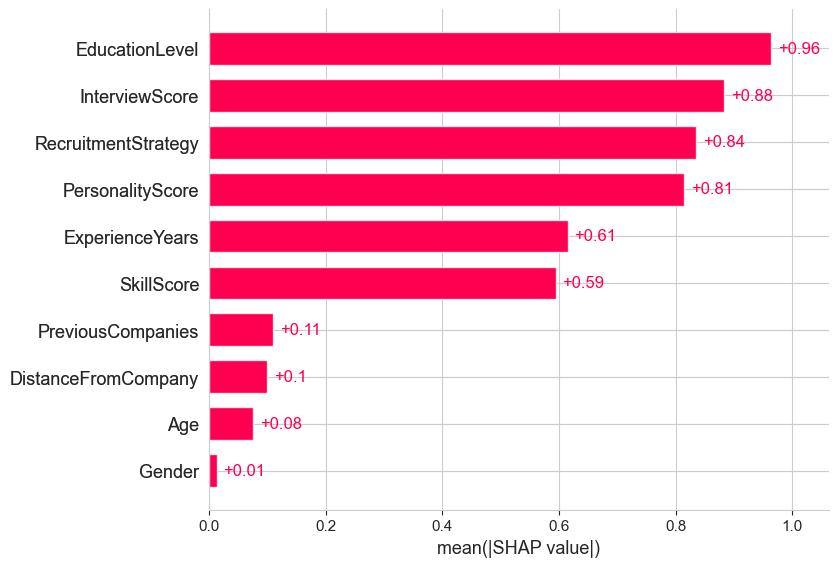

In [90]:
custom_explanation = shap.Explanation(
    values=shap_values,
    base_values=explainer.expected_value,
    data=X_test.values,
    feature_names=X.columns
)
shap.plots.bar(custom_explanation)

In [86]:
custom_kernel_explainer = KernelExplainer(predict_function, X_train, max_samples=len(X_train), random_state=42)
custom_kernel_shap_values = custom_kernel_explainer.shap_values(X_test)[1]

Calculating SHAP values: 100%|██████████| 300/300 [00:10<00:00, 29.36instance/s]


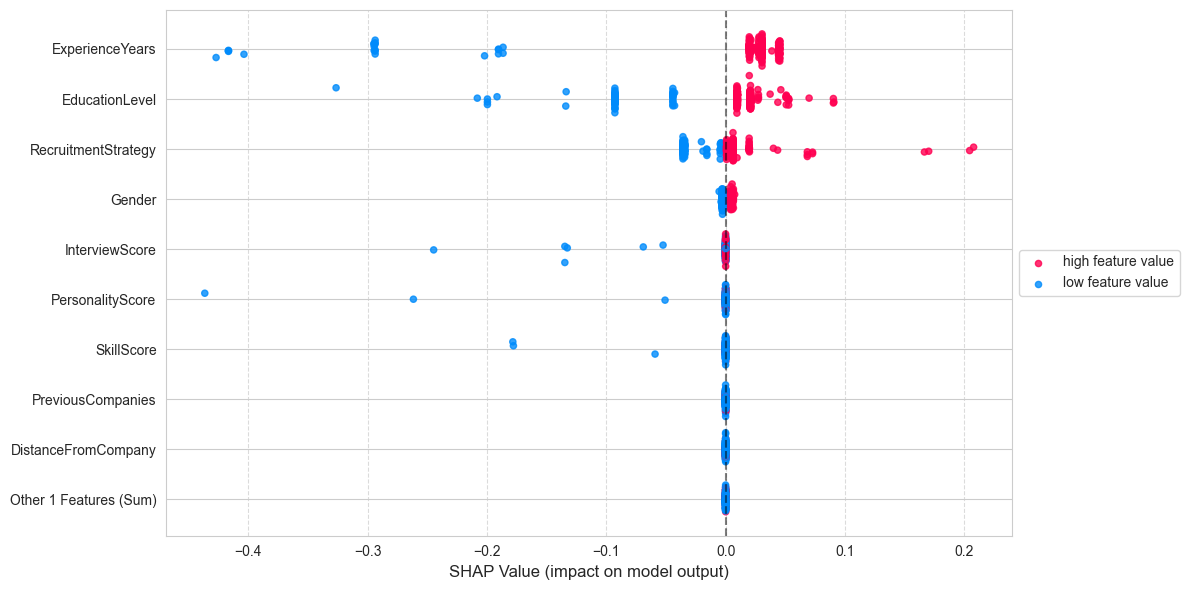

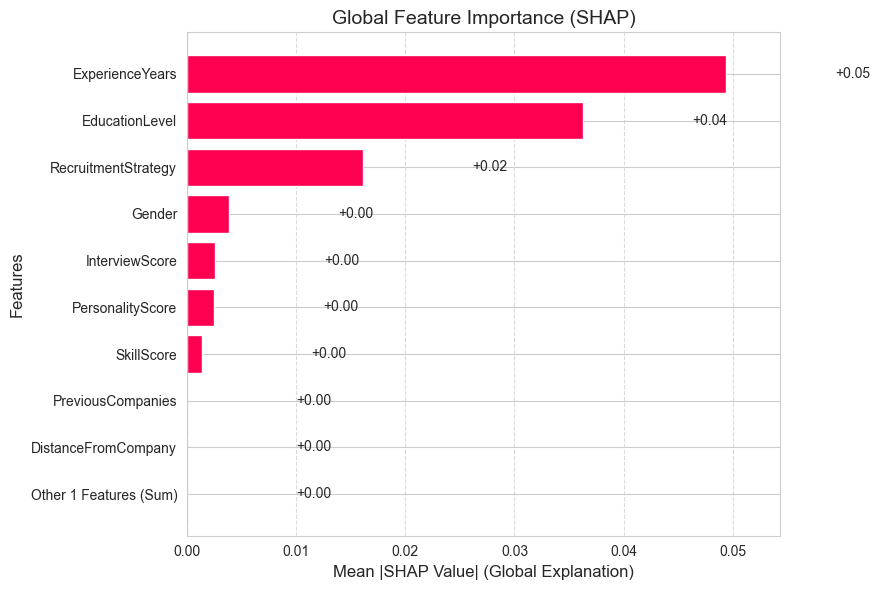

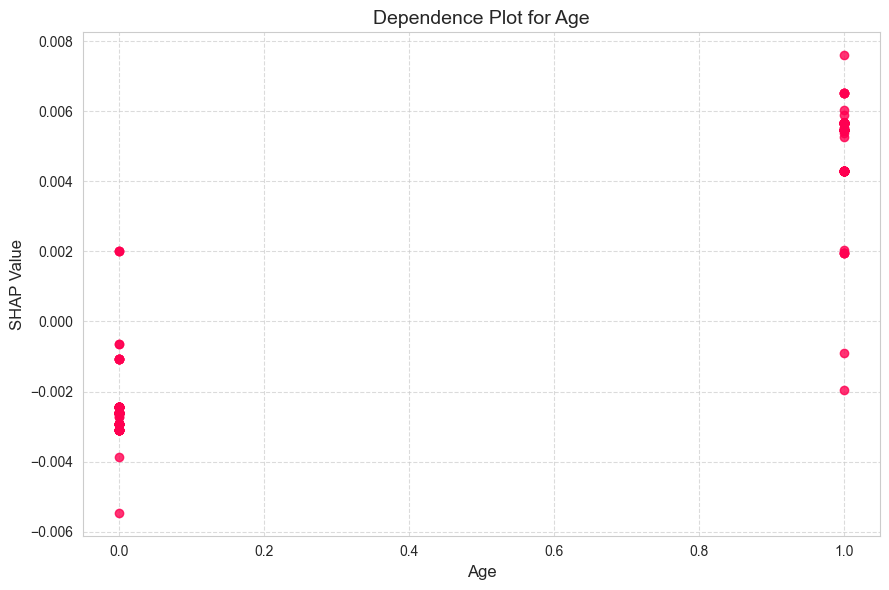

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Error in callback <function _draw_all_if_interactive at 0x000001D4CA3FC310> (for post_execute), with arguments args (),kwargs {}:


TypeError: only size-1 arrays can be converted to Python scalars

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 900x600 with 1 Axes>

In [87]:
values = custom_kernel_shap_values
expected_value = custom_kernel_explainer.expected_value
data = X_test.values
feature_names = X.columns

plotter = ShapPlotter()

plotter.beeswarm(values, feature_names)
plotter.bar(values, feature_names)
plotter.dependence(values[:, 1], data[:, 1], feature_names[0])
plotter.waterfall(values[0, :], feature_names, expected_value)
